<a href="https://colab.research.google.com/github/AI-Tiger/ml-project/blob/main/GAN_ch4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
!git clone https://github.com/NVlabs/stylegan
%cd stylegan

Cloning into 'stylegan'...
remote: Enumerating objects: 86, done.
remote: Total 86 (delta 0), reused 0 (delta 0), pack-reused 86
Unpacking objects: 100% (86/86), done.
/content/stylegan/stylegan


In [ ]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/My Drive/karras2019stylegan-ffhq-1024x1024.pkl' ./

In [ ]:
with open('karras2019stylegan-ffhq-1024x1024.pkl', 'rb') as f:
    _G, _D, Gs = pickle.load(f)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
Gs.print_layers()


Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 512)             (512, 512)      
G_mapping/Dense3                262656 

In [ ]:
image_filename = 'example.png'

In [ ]:
noise = np.random.uniform(size=[1, 512], low=-1.0, high=1.0)
noise.shape

(1, 512)

In [ ]:
# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(noise, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

# Save image.
PIL.Image.fromarray(images[0], 'RGB').save(image_filename)

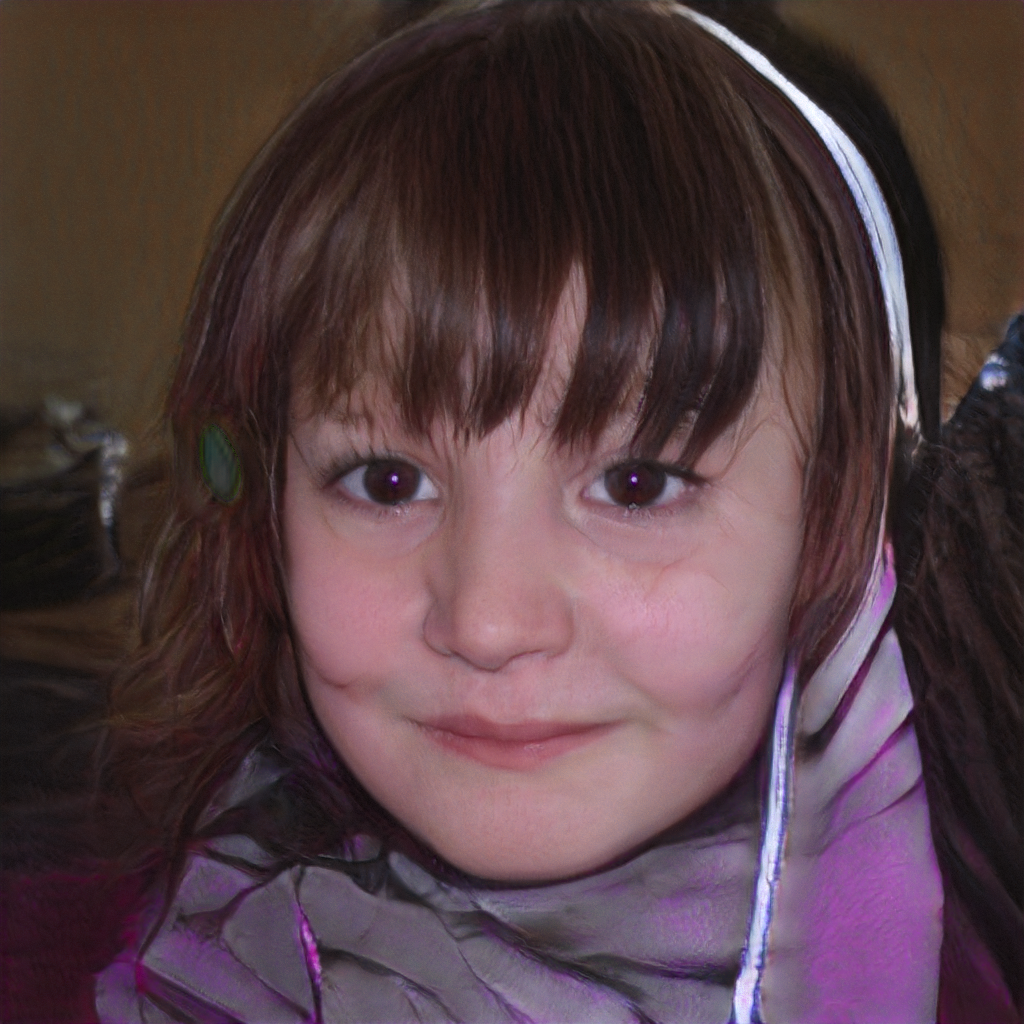

In [ ]:
from IPython.display import Image as IPImage
from IPython.display import display_png

display_png(IPImage('example.png'))

In [ ]:
from google.colab import files
files.download(image_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>